<a href="https://colab.research.google.com/github/sphy1597/3-2-ML/blob/main/wine_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 폰트 설치
실행한 뒤 런타임 재시작


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,968 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

구글 드라이브 연동 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


필요한 라이브러리 

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import SVC



와인 데이터

In [83]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,1:red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [111]:
## 6.5점을 기준으로 좋은 와인과 나쁜 와인을 구분
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins,  labels = group_names)
 
 
## 굿 배드는 인식할 수 없기때문에 인식할 수 있도록 Label Encoding을 실시 
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

input = df.drop(['quality', '1:red'], axis=1)
target = df['quality']

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2) 

#정규화
x_train = normalize(x_train, axis = 0)
x_test = normalize(x_test, axis = 0)

# 표준화
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)



In [114]:
x_test.shape

(1300, 11)

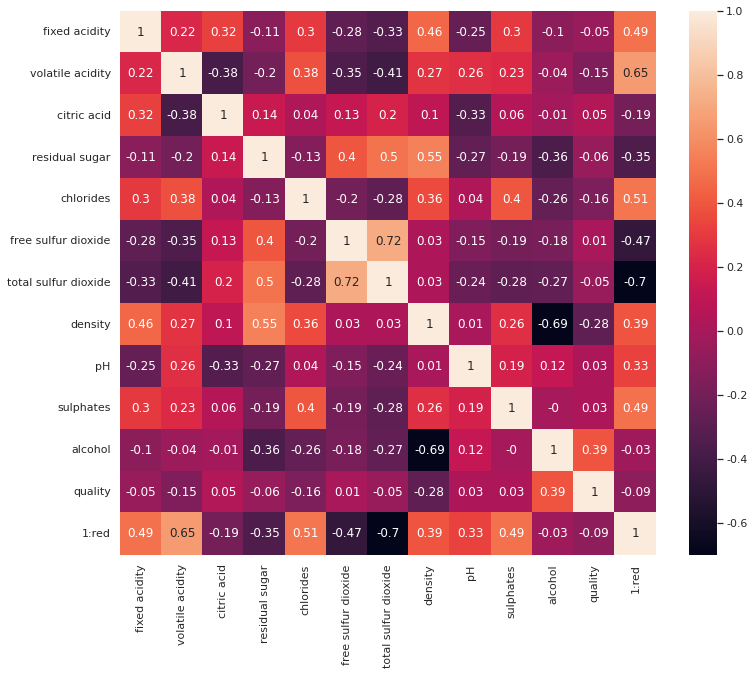

In [105]:
sns.set(rc={'figure.figsize':(12,10)})    # 상관행렬 가시
correlation_matrix = df.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)

회귀모델 

In [106]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [107]:
print('예측점수 : ', regr.score(x_test,y_test))
y_hat_test = regr.predict(x_test)
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

예측점수 :  0.1856049865891004
Mean squared error: 0.12265608115886965


logistic

In [108]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [109]:
print(classification_report(y_test, y_pred))
print("정답률 :", metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1064
           1       0.54      0.29      0.38       235
           2       0.00      0.00      0.00         1

    accuracy                           0.83      1300
   macro avg       0.47      0.41      0.43      1300
weighted avg       0.80      0.83      0.81      1300

정답률 : 0.8276923076923077


svc

In [110]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
print("정답률 :", metrics.accuracy_score(y_test, svc_pred))



정답률 : 0.8515384615384616


##분류

svm

In [ ]:
svm_model = SVC(C=10,gamma=0.01, kernel='rbf')
svm_model.fit(x_)